In [162]:
# Import modules!
import numpy as np
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sb
%load_ext sql

%sql sqlite:///videogames.db
conn = sqlite3.connect('videogames.db')


#Uploading the csv
videogames = pd.read_csv('VIDEOGAMESSALES.csv')
videogames.count()



The sql extension is already loaded. To reload it, use:
  %reload_ext sql


ProductID       16598
Name            16598
Platform        16598
PlatformID      16598
Year            16327
Genre           16598
GenreID         16598
Publisher       16540
PublisherID     16598
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [163]:
# Descriptive Statistic of The Dataset 
videogames.describe(include='all')

,ProductID,Name,Platform,PlatformID,Year,Genre,GenreID,Publisher,PublisherID,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16598.000000,16327.000000,16598,16598.000000,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,NaN,12,NaN,578,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,NaN,Action,NaN,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,NaN,3316,NaN,1351,NaN,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,8299.500000,2006.406443,NaN,8299.500000,NaN,8299.500000,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,4791.574219,5.828981,NaN,4791.574219,NaN,4791.574219,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1.000000,1980.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,4150.250000,2003.000000,NaN,4150.250000,NaN,4150.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,8299.500000,2007.000000,NaN,8299.500000,NaN,8299.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,12448.750000,2010.000000,NaN,12448.750000,NaN,12448.750000,0.240000,0.110000,0.040000,0.040000,0.470000


In [164]:
ratings = videogames['Genre']
ratings.describe(include='all')

count      16598
unique        12
top       Action
freq        3316
Name: Genre, dtype: object

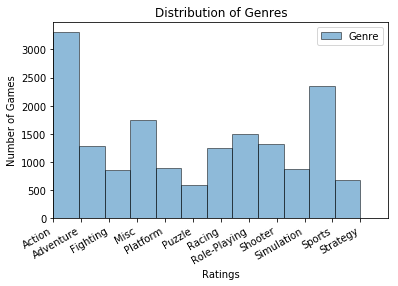

In [165]:
fig,ax = plt.subplots()

"Create a histogram that shows the distribution of age among respondents."
genre = videogames['Genre']
plt.hist(genre, alpha=.50, label='Genre', bins=12, ec="k")
plt.xlim(0,12)
plt.xlabel('Ratings')
plt.ylabel('Number of Games')
plt.title('Distribution of Genres')

# Add legend
plt.legend()

# Show the figure
fig.autofmt_xdate()
plt.show()

In [166]:
%%sql
SELECT COUNT(*)
FROM ProductSalesFact
WHERE Year = 1994;

Done.


COUNT(*)
121


In [167]:
%%sql
SELECT COUNT(*)
FROM ProductSalesFact
WHERE Year = 1995;

Done.


COUNT(*)
219


-0.0747347976157


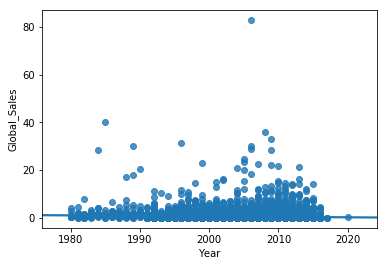

In [168]:
print(videogames['Global_Sales'].corr(videogames['Year']))
plt.xlabel("Year")
plt.ylabel('Global_Sales')
sb.regplot(videogames['Year'],videogames['Global_Sales'], fit_reg=True,)
plt.show()

In [174]:
%%sql
SELECT Name,MAX(Global_Sales), Year
FROM VideoGameTable;

Done.


Name,MAX(Global_Sales),Year
Wii Sports,82.74,2006


In [175]:
%%sql
SELECT Name,MIN(Global_Sales), Year
FROM VideoGameTable;

Done.


Name,MIN(Global_Sales),Year
Turok,0.01,2008


In [191]:
%%sql
SELECT Name, Global_Sales, Platform, Year
FROM VideoGameTable
WHERE Name = "Star Wars Battlefront (2015)"

Done.


Name,Global_Sales,Platform,Year
Star Wars Battlefront (2015),7.67,PS4,2015
Star Wars Battlefront (2015),3.49,XOne,2015
Star Wars Battlefront (2015),0.54,PC,2015
